<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-Trials" data-toc-modified-id="Initial-Trials-1">Initial Trials</a></span></li><li><span><a href="#L3-Bentonite" data-toc-modified-id="L3-Bentonite-2">L3 Bentonite</a></span></li><li><span><a href="#CH-vs-L3---t0" data-toc-modified-id="CH-vs-L3---t0-3">CH vs L3 - t0</a></span></li><li><span><a href="#Using-LMFIT" data-toc-modified-id="Using-LMFIT-4">Using LMFIT</a></span></li><li><span><a href="#CH-vs-L3---t1" data-toc-modified-id="CH-vs-L3---t1-5">CH vs L3 - t1</a></span></li><li><span><a href="#Acidic" data-toc-modified-id="Acidic-6">Acidic</a></span></li><li><span><a href="#Data-Mining" data-toc-modified-id="Data-Mining-7">Data Mining</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats as scys
import matplotlib as mpl
%matplotlib inline

# Set the cycler to Saint-Gobain Color Scheme
c1 = '#163fd8'
c4 = '#c8A2C8'
c3 = '#eb3f6c'
c2 = '#9bc540'
c5 = '#fc7a35'
c6 = '#fdb68c'


plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=[c1, c2, c3, c4, c5, c6])
plt.rcParams['lines.linewidth'] = 2 # 4 # for slides
#plt.rcParams['font.size'] = 14 # for slides


mpl.get_cachedir()
set([f.name for f in mpl.font_manager.fontManager.afmlist])
mpl.rc('font', family='sans-serif') 
mpl.rc('font', serif='Helvetica Neue') 


def hb_model_fitting(sr, ss, show_param=0, debug_initial_linreg=0):
    '''
    Function to fit the data of a flow curve into a Herschel–Bulkley fluid model:
    tau = tau_0 + k gamma_dot^n
    
    Parameters
    ----------
    sr: Shear rates
    ss: Shear stresses 
    show_param: Print the calculated parameters of the model
    debug_initial_linreg: Plot the initial regression used to find the yield stress
    
    '''
    slope, tau_0, r_value, p_value, std_err = scys.linregress(sr, ss)
    
    if debug_initial_linreg:
        plt.plot(sr, sr*slope+tau_0, zorder=3, label='Linear Regression')
        plt.plot(sr, ss, 'o', label='Data')
        plt.xlabel('Shear rate (s-¹)')
        plt.ylabel('Shear stress (Pa)')
        plt.legend()
        plt.grid()
        plt.show()
        
    if show_param:
        print('R-squared of initial linear fitting: ' + str(round(r_value**2, 3)))
    
    
    y = ss-tau_0
    Y = np.log(y[y>=0])
    X = np.log(sr.loc[y[y>=0].index])
    n, logk, r_value_hb, p_value_hb, std_err_hb = scys.linregress(X, Y)
    
    if show_param:
        print('R-squared of HB fitting: ' + str(round(r_value_hb**2, 3)))
        print('n: ' + str(round(n, 3)))
        print('k: ' + str(round(np.e**logk, 3)))
        print('Tau_0: ' + str(round(tau_0, 3)))

    return n, np.e**logk, tau_0

def histeresys_arrows(sr, ss, point):
    x = sr[point]
    y = ss[point]
    dx = sr[point+1] - sr[point]
    dy = ss[point+1] - ss[point]
    return x, y, dx, dy

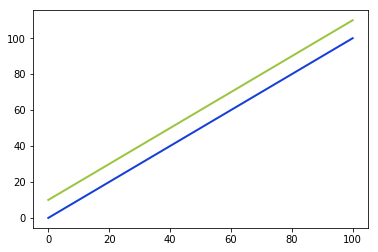

In [118]:
xs = np.linspace(0,100,1000)
for i in range(2):
    plt.plot(xs, xs+10*i)

# Initial Trials

In [2]:
# Load the data from the rheometer

L3 = pd.read_csv(r'./kinexus/L3 HB 0-500.csv', header=0, delimiter=',')
L3_Pre = pd.read_csv(r'./kinexus/L3 HB 0-500 - PreShear_500_1min.csv', header=0, delimiter=',')

L3.columns = [1,0]
L3_Pre.columns = [1,0]

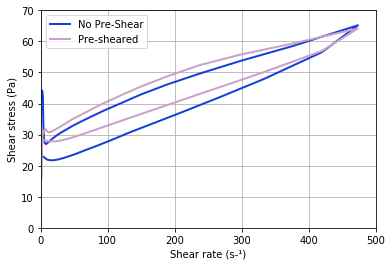

In [3]:
plt.plot(L3[0], L3[1], label='No Pre-Shear')
plt.plot(L3_Pre[0], L3_Pre[1], label='Pre-sheared')

plt.xlim(0, 500)
plt.ylim(0, 70)

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')

plt.grid()
plt.show()

<IPython.core.display.Javascript object>


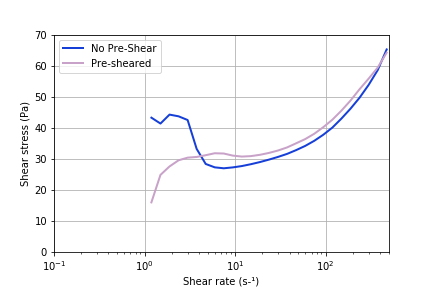

In [93]:
plt.semilogx(L3[0][:27], L3[1][:27], label='No Pre-Shear')
plt.semilogx(L3_Pre[0][:27], L3_Pre[1][:27], label='Pre-sheared')

plt.xlim(0.1, 500)
plt.ylim(0, 70)

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')

plt.grid()
plt.show()

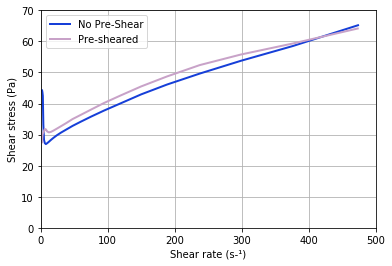

In [5]:
plt.plot(L3[0][2:27], L3[1][2:27], label='No Pre-Shear')

plt.plot(L3_Pre[0][2:27], L3_Pre[1][2:27], label='Pre-sheared')

plt.xlim(0, 500)
plt.ylim(0, 70)

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')

plt.grid()
plt.show()

R-squared of initial linear fitting: 0.983
R-squared of HB fitting: 0.836
n: 1.359
k: 0.014
Tau_0: 28.202


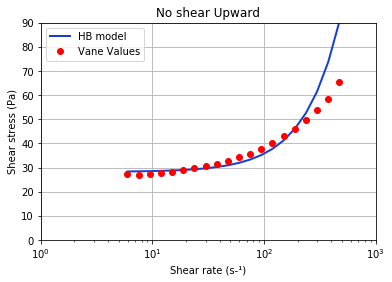

In [17]:
n, k, tau_0 = hb_model_fitting(L3[0][7:27], L3[1][7:27], show_param=1)

plt.semilogx(L3[0][7:27], tau_0+k*L3[0][7:27]**n, label='HB model')
plt.semilogx(L3[0][7:27], L3[1][7:27], 'o', c='r', label='Vane Values')

plt.xlim(1, 1000)
plt.ylim(0, 90)

plt.title('No shear Upward')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')
plt.grid()
plt.show()

R-squared of initial linear fitting: 0.972
R-squared of HB fitting: 0.402
n: 0.468
k: 0.576
Tau_0: 21.409


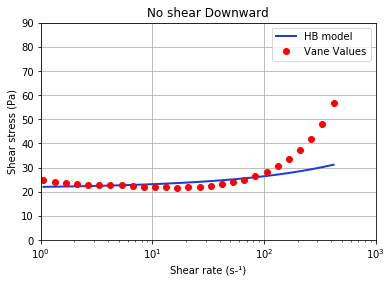

In [18]:
n, k, tau_0 = hb_model_fitting(L3[0][-27:], L3[1][-27:], show_param=1)

plt.semilogx(L3[0][-27:], tau_0+k*L3[0][-27:]**n, label='HB model')
plt.semilogx(L3[0][-27:], L3[1][-27:], 'o', c='r', label='Vane Values')

plt.xlim(1, 1000)
plt.ylim(0, 90)

plt.title('No shear Downward')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')
plt.grid()
plt.show()

R-squared of initial linear fitting: 0.974
R-squared of HB fitting: 0.85
n: 1.178
k: 0.031
Tau_0: 31.177


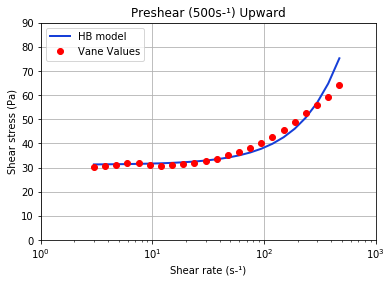

In [19]:
n, k, tau_0 = hb_model_fitting(L3_Pre[0][4:27], L3_Pre[1][4:27], show_param=1)

plt.semilogx(L3_Pre[0][4:27], tau_0+k*L3_Pre[0][4:27]**n, label='HB model')
plt.semilogx(L3_Pre[0][4:27], L3_Pre[1][4:27], 'o', c='r', label='Vane Values')

plt.xlim(1, 1000)
plt.ylim(0, 90)

plt.title('Preshear (500s-¹) Upward')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')
plt.grid()
plt.show()

R-squared of initial linear fitting: 0.989
R-squared of HB fitting: 0.764
n: 0.642
k: 0.321
Tau_0: 26.835


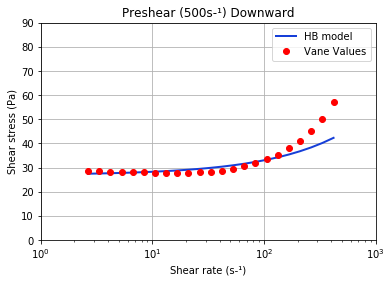

In [22]:
n, k, tau_0 = hb_model_fitting(L3_Pre[0][-27:-4], L3_Pre[1][-27:-4], show_param=1)

plt.semilogx(L3_Pre[0][-27:-4], tau_0+k*L3_Pre[0][-27:-4]**n, label='HB model')
plt.semilogx(L3_Pre[0][-27:-4], L3_Pre[1][-27:-4], 'o', c='r', label='Vane Values')

plt.xlim(1, 1000)
plt.ylim(0, 90)

plt.title('Preshear (500s-¹) Downward')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')
plt.grid()
plt.show()

# L3 Bentonite

In [9]:
L3_05 = pd.read_csv(r'./kinexus/L3 HB  1-500 - PreShear_500_05min Inverse.csv', header=0, delimiter=',')
L3_1 = pd.read_csv(r'./kinexus/L3 HB  1-500 - PreShear_500_1min Inverse.csv', header=0, delimiter=',')
L3_PS = pd.read_csv(r'./kinexus/L3 HB 0-500 - PreShear_500_1min_Longer ramp_2.csv', header=0, delimiter=',')

L3_05.columns = ['ss', 'sr', 'eta', 'omega', 'Steady state']
L3_1.columns = ['ss', 'sr', 'eta', 'omega', 'Steady state']
L3_PS.columns = ['ss', 'sr', 'Steady state', 'omega']

L3_05['freq'] = L3_05['omega'].apply(lambda x: x/(2*np.pi))
L3_1['freq'] = L3_1['omega'].apply(lambda x: x/(2*np.pi))
L3_PS['freq'] = L3_PS['omega'].apply(lambda x: x/(2*np.pi))

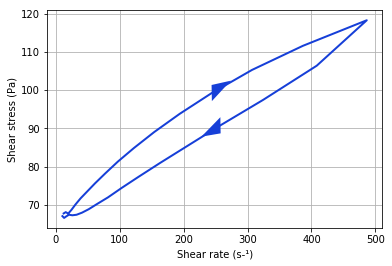

In [28]:
plt.plot(L3_PS['sr'][10:-10], L3_PS['ss'][10:-10])
#plt.plot(L3_PS['sr'][27:], L3_PS['ss'][27:])


plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.arrow(*histeresys_arrows(L3_PS['sr'], L3_PS['ss'], 22), head_width=4.25, head_length=30, lw=0, zorder=3)
plt.arrow(*histeresys_arrows(L3_PS['sr'], L3_PS['ss'], 28), head_width=4.25, head_length=30, lw=0, zorder=3)

#plt.legend()

plt.grid()
plt.savefig('./Rheology/Results/HysteresisLoop-L3.png', dpi=600)
plt.show()

<IPython.core.display.Javascript object>


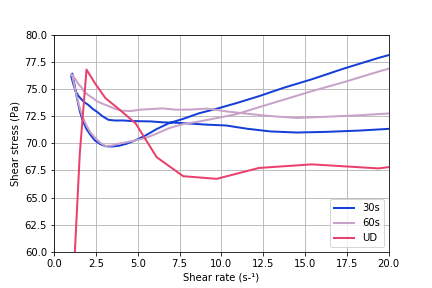

In [30]:
%matplotlib notebook
L3_05.plot(x='sr', y='ss', kind='line', xlim=[0,500], label='30s', legend=0, logx=0)
L3_1.plot(x='sr', y='ss', kind='line', xlim=[0,500], label='60s', legend=0, ax=plt.gca(), logx=0)

plt.plot(L3_PS['sr'][:27], L3_PS['ss'][:27], label='UD')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.xlim([0, 20])
plt.ylim([60, 80])

plt.legend()

plt.grid()
plt.show()

<IPython.core.display.Javascript object>


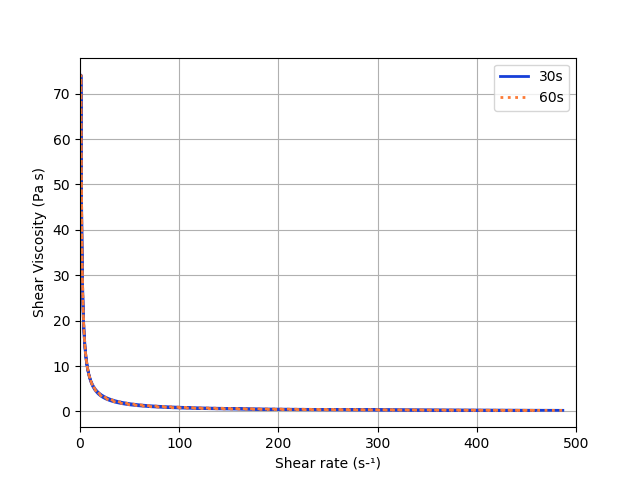

In [42]:
L3_05.plot(x='sr', y='eta', kind='line', xlim=[0,500], label='30s', legend=0)
L3_1.plot(x='sr', y='eta', kind='line', xlim=[0,500], label='60s', legend=0, ax=plt.gca(), ls=':')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear Viscosity (Pa s)')

plt.legend()

plt.grid()
plt.show()

<IPython.core.display.Javascript object>


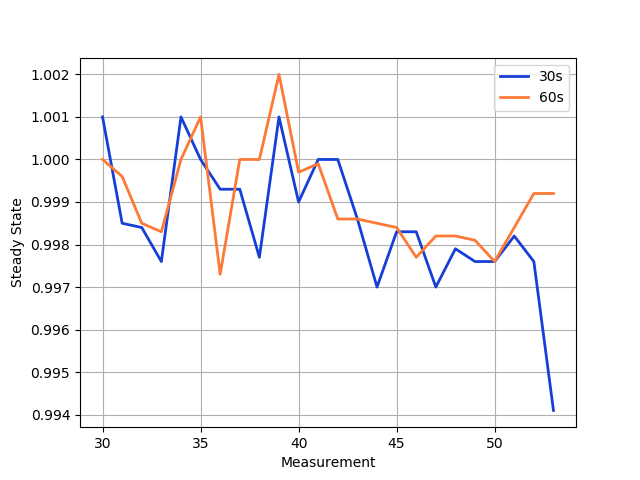

In [154]:
plt.plot(L3_05['Steady state'][30:54], label='30s')
plt.plot(L3_1['Steady state'][30:54], label='60s')


plt.xlabel('Measurement')
plt.ylabel('Steady State')

plt.legend()

plt.grid()
plt.show()

R-squared of initial linear fitting: 0.999
R-squared of HB fitting: 0.993
n: 0.936
k: 0.107
Tau_0: 70.877


<IPython.core.display.Javascript object>


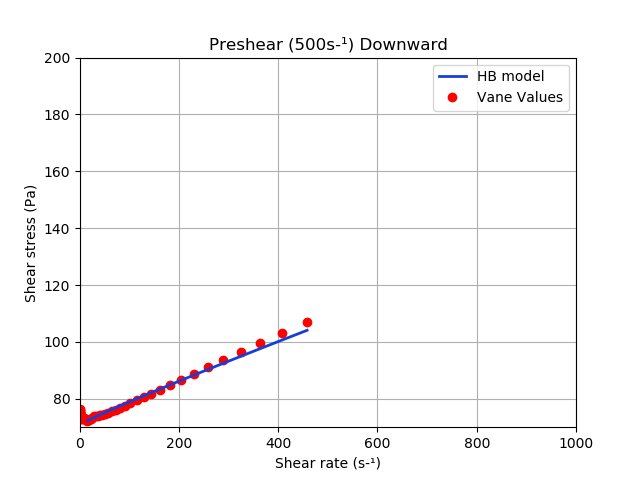

In [149]:
n, k, tau_0 = hb_model_fitting(L3_1['sr'][:30], L3_1['ss'][:30], show_param=1)

plt.plot(L3_1['sr'][:30], tau_0+k*L3_1['sr'][:30]**n, label='HB model', zorder=3)
plt.plot(L3_1['sr'][:54], L3_1['ss'][:54], 'o', c='r', label='Vane Values')

plt.xlim(1, 1000)
plt.ylim(70, 200)

plt.title('Preshear (500s-¹) Downward')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


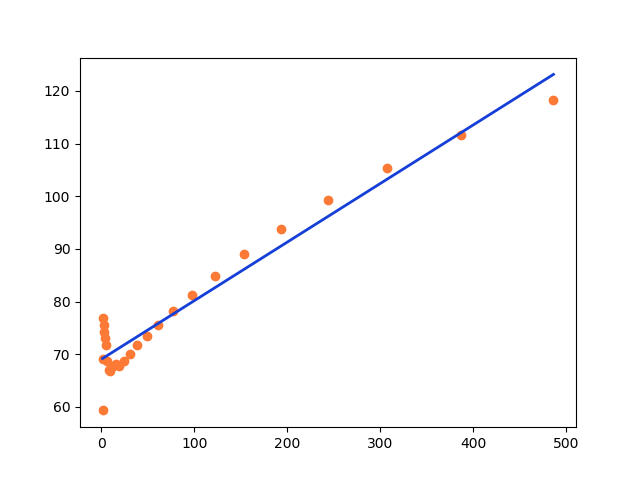

In [177]:
n, k, tau_0 = hb_model_fitting(L3_PS['sr'][:27], L3_PS['ss'][:27], debug_initial_linreg=1)

R-squared of initial linear fitting: 0.937
R-squared of HB fitting: 0.462
n: 0.648
k: 0.648
Tau_0: 69.049


<IPython.core.display.Javascript object>


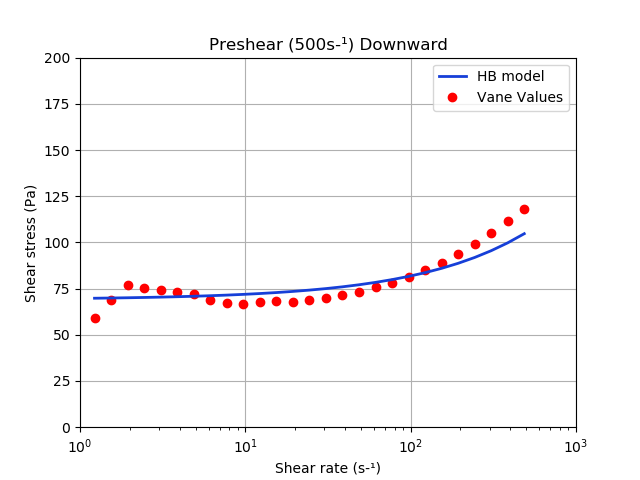

In [183]:
n, k, tau_0 = hb_model_fitting(L3_PS['sr'][:27], L3_PS['ss'][:27], show_param=1)

plt.semilogx(L3_PS['sr'][:27], tau_0+k*L3_PS['sr'][:27]**n, label='HB model', zorder=3)
plt.semilogx(L3_PS['sr'][:27], L3_PS['ss'][:27], 'o', c='r', label='Vane Values')

plt.xlim(1, 1000)
plt.ylim(0, 200)

plt.title('Preshear (500s-¹) Downward')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')
plt.grid()
plt.show()

# CH vs L3 - t0

In [2]:
CH_NOPS_30 = pd.read_csv(r'./kinexus/CH HB - NoPS - 30%.csv', header=0, delimiter=',')
CH_PS500_30 = pd.read_csv(r'./kinexus/CH HB - PS500 - 30%.csv', header=0, delimiter=',')

CH_NOPS_40 = pd.read_csv(r'./kinexus/CH HB - NoPS - 40%.csv', header=0, delimiter=',')
CH_PS500_40 = pd.read_csv(r'./kinexus/CH HB - PS500 - 40%.csv', header=0, delimiter=',')


CH_NOPS_50_1 = pd.read_csv(r'./kinexus/CH HB - NoPS - 1 - 50.csv', header=0, delimiter=',')
CH_NOPS_50_2 = pd.read_csv(r'./kinexus/CH HB - NoPS - 2 - 50%.csv', header=0, delimiter=',')

CH_PS500_50_1 = pd.read_csv(r'./kinexus/CH HB - PS500 - 1 - 50%.csv', header=0, delimiter=',')
CH_PS500_50_2 = pd.read_csv(r'./kinexus/CH HB - PS500 - 2 - 50%.csv', header=0, delimiter=',')


L3_NOPS_30 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 30%.csv', header=0, delimiter=',')
L3_PS500_30 = pd.read_csv(r'./kinexus/L3 HB - PS500 - 30%.csv', header=0, delimiter=',')

L3_NOPS_40 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 40%.csv', header=0, delimiter=',')
L3_PS500_40 = pd.read_csv(r'./kinexus/L3 HB - PS500 - 40%.csv', header=0, delimiter=',')


L3_NOPS_50_1 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 1 - 50%.csv', header=0, delimiter=',')
L3_NOPS_50_2 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 2 - 50%.csv', header=0, delimiter=',')

L3_PS500_50 = pd.read_csv(r'./kinexus/L3 HB - PS500 - 50%.csv', header=0, delimiter=',')

L3_NOPS_60_1 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 1 - 60%.csv', header=0, delimiter=',')
L3_NOPS_60_2 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 2 - 60%.csv', header=0, delimiter=',')

L3_PS500_60_1 = pd.read_csv(r'./kinexus/L3 HB - PS500 - 1 - 60%.csv', header=0, delimiter=',')
L3_PS500_60_2 = pd.read_csv(r'./kinexus/L3 HB - PS500 - 2 - 60%.csv', header=0, delimiter=',')


dfs_t0 = [CH_NOPS_30, CH_PS500_30, CH_NOPS_40, CH_PS500_40, CH_NOPS_50_1, CH_NOPS_50_2,
       CH_PS500_50_1, CH_PS500_50_2, L3_NOPS_30, L3_PS500_30, L3_NOPS_40, L3_PS500_40,
       L3_NOPS_50_1, L3_NOPS_50_2, L3_PS500_50, L3_NOPS_60_1, L3_NOPS_60_2, L3_PS500_60_1, L3_PS500_60_2]
dfs_label = ['CH_NOPS_30', 'CH_PS500_30', 'CH_NOPS_40', 'CH_PS500_40', 'CH_NOPS_50_1', 'CH_NOPS_50_2',
       'CH_PS500_50_1', 'CH_PS500_50_2', 'L3_NOPS_30', 'L3_PS500_30', 'L3_NOPS_40', 'L3_PS500_40',
       'L3_NOPS_50_1', 'L3_NOPS_50_2', 'L3_PS500_50', 'L3_NOPS_60_1', 'L3_NOPS_60_2', 'L3_PS500_60_1', 'L3_PS500_60_2']

for df in dfs_t0:
    df.columns = ['ss', 'sr', 'eta', 'omega', 'Steady state']

R-squared of initial linear fitting: 0.966
R-squared of HB fitting: 0.853
n: 1.221
k: 0.026
Tau_0: 8.725


<IPython.core.display.Javascript object>


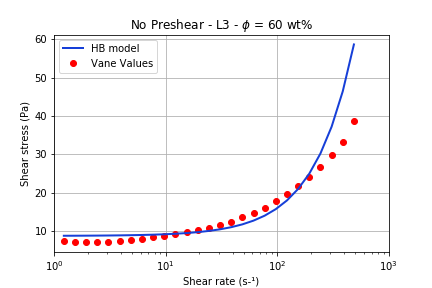

In [95]:
n, k, tau_0 = hb_model_fitting(L3_NOPS_60_2['sr'][:27], L3_NOPS_60_2['ss'][:27], show_param=1)

plt.semilogx(L3_NOPS_60_2['sr'][:27], tau_0+k*L3_NOPS_60_2['sr'][:27]**n, label='HB model', zorder=3)
plt.semilogx(L3_NOPS_60_2['sr'][:27], L3_NOPS_60_2['ss'][:27], 'o', c='r', label='Vane Values')

plt.xlim(1, 1000)
#plt.ylim(0, 200)

plt.title('No Preshear - L3 - $\phi$ = 60 wt%')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')
plt.grid()

R-squared of initial linear fitting: 0.754
R-squared of HB fitting: 0.808
n: 0.816
k: 4.458
Tau_0: 502.822


<IPython.core.display.Javascript object>


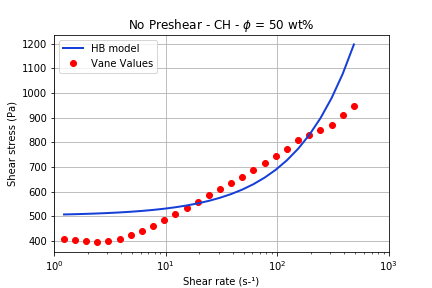

In [97]:
n, k, tau_0 = hb_model_fitting(CH_NOPS_50_2['sr'][:27], CH_NOPS_50_2['ss'][:27], show_param=1)

plt.semilogx(CH_NOPS_50_2['sr'][:27], tau_0+k*CH_NOPS_50_2['sr'][:27]**n, label='HB model', zorder=3)
plt.semilogx(CH_NOPS_50_2['sr'][:27], CH_NOPS_50_2['ss'][:27], 'o', c='r', label='Vane Values')

#plt.scatter(CH_NOPS_50_2['sr'][:27], CH_NOPS_50_2['ss'][:27], 'o', c='r', label='Vane Values')


plt.xlim(1, 1000)
#plt.ylim(0, 200)

plt.title('No Preshear - CH - $\phi$ = 50 wt%')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend(loc='best')
plt.grid()

<IPython.core.display.Javascript object>


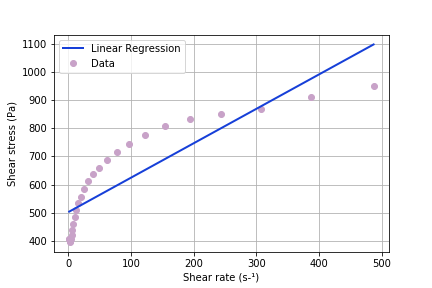

R-squared of initial linear fitting: 0.754
R-squared of HB fitting: 0.808
n: 0.816
k: 4.458
Tau_0: 502.822


(0.81565892341371604, 4.4577442620535113, 502.82166705161302)

In [104]:
 hb_model_fitting(CH_NOPS_50_2['sr'][:27], CH_NOPS_50_2['ss'][:27], show_param=1, debug_initial_linreg=1)

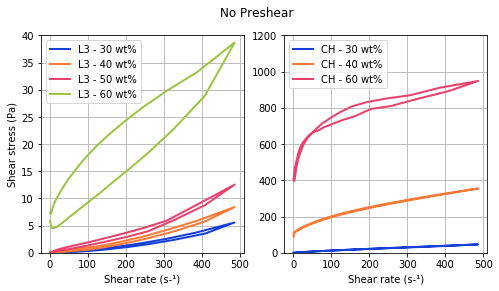

In [8]:
f, axs = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(8,4))

axs[0].plot(L3_NOPS_30['sr'], L3_NOPS_30['ss'], label='L3 - 30 wt%')
axs[0].plot(L3_NOPS_40['sr'], L3_NOPS_40['ss'], label='L3 - 40 wt%')
axs[0].plot(L3_NOPS_50_2['sr'], L3_NOPS_50_2['ss'], label='L3 - 50 wt%')
axs[0].plot(L3_NOPS_60_2['sr'], L3_NOPS_60_2['ss'], label='L3 - 60 wt%')


axs[1].plot(CH_NOPS_30['sr'], CH_NOPS_30['ss'], label='CH - 30 wt%')
axs[1].plot(CH_NOPS_40['sr'], CH_NOPS_40['ss'], label='CH - 40 wt%')
axs[1].plot(CH_NOPS_50_2['sr'], CH_NOPS_50_2['ss'], label='CH - 60 wt%')


flat_axs = axs.flatten()
#axs[0, 1].plot()
#axs[1, 1].plot()
#axs[2, 1].plot()

flat_axs[-1].set_xlabel('Shear rate (s-¹)')
flat_axs[-2].set_xlabel('Shear rate (s-¹)')

flat_axs[0].set_ylabel('Shear stress (Pa)')

flat_axs[0].set_ylim(0,40)
flat_axs[1].set_ylim(0,1200)



for ax in flat_axs:
    ax.legend()
    ax.grid()
    
plt.suptitle('No Preshear')
plt.savefig('L3vsCH_NOPS.png', dpi=600)
plt.show()

<IPython.core.display.Javascript object>


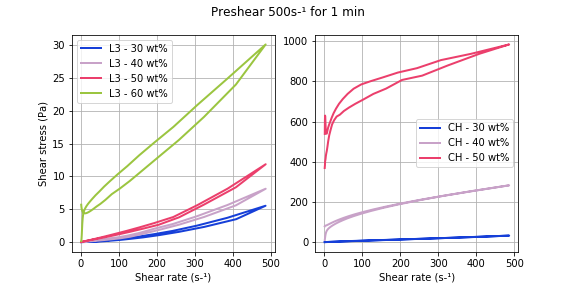

In [81]:
f, axs = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(8,4))

axs[0].plot(L3_PS500_30['sr'], L3_PS500_30['ss'], label='L3 - 30 wt%')
axs[0].plot(L3_PS500_40['sr'], L3_PS500_40['ss'], label='L3 - 40 wt%')
axs[0].plot(L3_PS500_50['sr'], L3_PS500_50['ss'], label='L3 - 50 wt%')
axs[0].plot(L3_PS500_60_2['sr'], L3_PS500_60_2['ss'], label='L3 - 60 wt%')


axs[1].plot(CH_PS500_30['sr'], CH_PS500_30['ss'], label='CH - 30 wt%')
axs[1].plot(CH_PS500_40['sr'], CH_PS500_40['ss'], label='CH - 40 wt%')
axs[1].plot(CH_PS500_50_2['sr'], CH_PS500_50_2['ss'], label='CH - 50 wt%')


flat_axs = axs.flatten()
#axs[0, 1].plot()
#axs[1, 1].plot()
#axs[2, 1].plot()

flat_axs[-1].set_xlabel('Shear rate (s-¹)')
flat_axs[-2].set_xlabel('Shear rate (s-¹)')

flat_axs[0].set_ylabel('Shear stress (Pa)')

#flat_axs[0].set_ylim(0,10)
#flat_axs[1].set_ylim(0,700)

#flat_axs[0].set_xlim(0,20)
#flat_axs[1].set_xlim(0,20)


for ax in flat_axs:
    ax.legend()
    ax.grid()
    
plt.suptitle('Preshear 500s-¹ for 1 min')
#plt.savefig('L3vsCH_PS500.png', dpi=600)
plt.show()

<IPython.core.display.Javascript object>


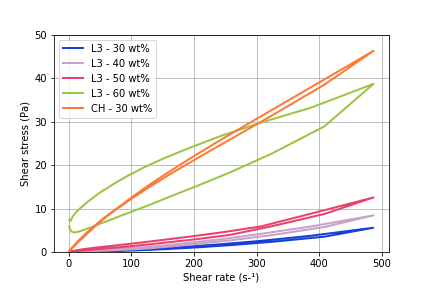

In [100]:
plt.plot(L3_NOPS_30['sr'], L3_NOPS_30['ss'], label='L3 - 30 wt%')
plt.plot(L3_NOPS_40['sr'], L3_NOPS_40['ss'], label='L3 - 40 wt%')
plt.plot(L3_NOPS_50_2['sr'], L3_NOPS_50_2['ss'], label='L3 - 50 wt%')
plt.plot(L3_NOPS_60_2['sr'], L3_NOPS_60_2['ss'], label='L3 - 60 wt%')

plt.plot(CH_NOPS_30['sr'], CH_NOPS_30['ss'], label='CH - 30 wt%')

#plt.plot(CH_NOPS_40['sr'], CH_NOPS_40['ss'], label='CH - 40 wt%')


plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.ylim(0, 50)

plt.legend()
plt.grid()
plt.savefig('./Rheology/Results/L3vsCH30.png', dpi=600)
plt.show()

# Using LMFIT

In [3]:
!pip install lmfit

    100% |################################| 1.2MB 1.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for lmfit ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/0d/a6/68/abf184fe73980f559bd4d74cddd31c9bc1fb919579f3a62750
Successfully built lmfit


In [4]:
from lmfit import  Model
def hs_model(sr, tau_0, k, n):
    return  tau_0 + k*sr**n
hs_mod = Model(hs_model)


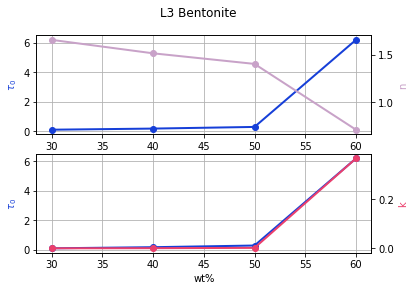

In [13]:
%matplotlib inline
dfs_L3 = [L3_NOPS_30, L3_NOPS_40, L3_NOPS_50_1, L3_NOPS_60_1]
wts = [30, 40, 50, 60]
taus = []
ks = []
ns = []
for df in dfs_L3:
    result = hs_mod.fit(df['ss'][:27], sr=df['sr'][:27], tau_0=5, k=5, n=1)
    tau_0, k, n = result.params.valuesdict().values()
    taus.append(tau_0)
    ks.append(k)
    ns.append(n)

f, axs = plt.subplots(2,1, sharey=True)
ax1, ax3 = axs
ax2 = ax1.twinx()
ax4 = ax3.twinx()

ax1.plot(wts, taus, c=c1, marker='o')
ax2.plot(wts, ns, c=c2, marker='o')
ax3.plot(wts, taus, c=c1, marker='o')
ax4.plot(wts, ks, c=c3, marker='o')

ax1.set_ylabel(r'$\tau_0$', color=c1)
ax2.set_ylabel('n', color=c2)
ax3.set_ylabel(r'$\tau_0$', color=c1)
ax4.set_ylabel('k', color=c3)

ax3.set_xlabel('wt%')

ax1.grid()
ax3.grid()
plt.suptitle('L3 Bentonite')
plt.show()

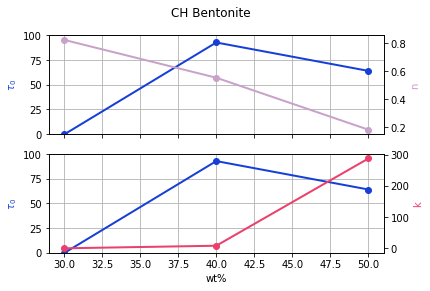

In [31]:
dfs_CH = [CH_NOPS_30, CH_NOPS_40, CH_NOPS_50_2]
wts = [30, 40, 50]
taus = []
ks = []
ns = []
for df in dfs_CH:
    result = hs_mod.fit(df['ss'][:27], sr=df['sr'][:27], tau_0=500, k=5, n=1)
    tau_0, k, n = result.params.valuesdict().values()
    taus.append(tau_0)
    ks.append(k)
    ns.append(n)

f, axs = plt.subplots(2,1, sharex=True)
ax1, ax3 = axs
ax2 = ax1.twinx()
ax4 = ax3.twinx()

ax1.plot(wts, taus, c=c1, marker='o')
ax2.plot(wts, ns, c=c2, marker='o')
ax3.plot(wts, taus, c=c1, marker='o')
ax4.plot(wts, ks, c=c3, marker='o')

ax1.set_ylabel(r'$\tau_0$', color=c1)
ax2.set_ylabel('n', color=c2)
ax3.set_ylabel(r'$\tau_0$', color=c1)
ax4.set_ylabel('k', color=c3)

ax3.set_xlabel('wt%')

ax1.set_ylim(0,100)
ax3.set_ylim(0,100)


ax1.grid()
ax3.grid()
plt.suptitle('CH Bentonite')
plt.show()

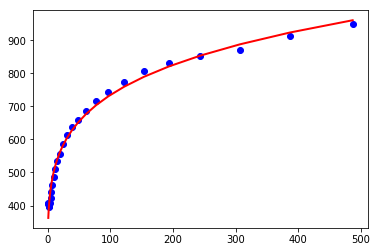

In [20]:
plt.plot(CH_NOPS_50_2['sr'][:27], CH_NOPS_50_2['ss'][:27], 'bo')
plt.plot(CH_NOPS_50_2['sr'][:27], result.best_fit, 'r-')
plt.show()

In [35]:
result.best_fit[1]

375.34813553221647

In [33]:
result = hs_mod.fit(CH_NOPS_50_2['ss'][:27], sr=CH_NOPS_50_2['sr'][:27], tau_0=500, k=5, n=1)
print(result.fit_report())

[[Model]]
    Model(hs_model)
[[Fit Statistics]]
    # function evals   = 86
    # data points      = 27
    # variables        = 3
    chi-square         = 8037.427
    reduced chi-square = 334.893
    Akaike info crit   = 159.793
    Bayesian info crit = 163.680
[[Variables]]
    tau_0:   64.0305339 +/- 75.10829 (117.30%) (init= 500)
    k:       287.505100 +/- 67.06329 (23.33%) (init= 5)
    n:       0.18373733 +/- 0.025529 (13.89%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(tau_0, k)                  = -0.997 
    C(k, n)                      = -0.996 
    C(tau_0, n)                  =  0.988 



In [14]:
L3_taus_manual = []
L3_ks_manual = []
L3_ns_manual = []



for df, l in zip(dfs_L3, dfs_label):
    print(l+'\n')
    n, k, tau_0 = hb_model_fitting(df['sr'][:27], df['ss'][:27], show_param=1)
    L3_taus_manual.append(tau_0)
    L3_ks_manual.append(k)
    L3_ns_manual.append(n)
    print('\n ----------------------------------------------------------------'+'\n')

CH_NOPS_30

R-squared of initial linear fitting: 0.949
R-squared of HB fitting: 0.794
n: 0.495
k: 0.093
Tau_0: -0.142

 ----------------------------------------------------------------

CH_PS500_30

R-squared of initial linear fitting: 0.965
R-squared of HB fitting: 0.883
n: 0.566
k: 0.108
Tau_0: -0.143

 ----------------------------------------------------------------

CH_NOPS_40

R-squared of initial linear fitting: 0.973
R-squared of HB fitting: 0.976
n: 0.707
k: 0.086
Tau_0: -0.103

 ----------------------------------------------------------------

CH_PS500_40

R-squared of initial linear fitting: 0.979
R-squared of HB fitting: 0.94
n: 1.148
k: 0.034
Tau_0: 7.907

 ----------------------------------------------------------------



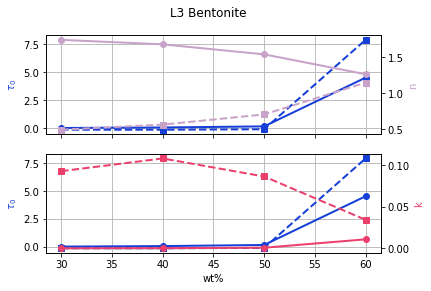

In [17]:
dfs_L3 = [L3_NOPS_30, L3_NOPS_40, L3_NOPS_50_1, L3_NOPS_60_1]
wts = [30, 40, 50, 60]
taus = []
ks = []
ns = []
for df in dfs_L3:
    result = hs_mod.fit(df['ss'][-27:], sr=df['sr'][-27:], tau_0=1, k=1, n=1)
    tau_0, k, n = result.params.valuesdict().values()
    taus.append(tau_0)
    ks.append(k)
    ns.append(n)

f, axs = plt.subplots(2,1, sharex=True)
ax1, ax3 = axs
ax2 = ax1.twinx()
ax4 = ax3.twinx()

ax1.plot(wts, taus, c=c1, marker='o')
ax2.plot(wts, ns, c=c2, marker='o')
ax3.plot(wts, taus, c=c1, marker='o')
ax4.plot(wts, ks, c=c3, marker='o')

ax1.plot(wts, L3_taus_manual, c=c1, marker='s', ls='--')
ax2.plot(wts, L3_ns_manual, c=c2, marker='s', ls='--')
ax3.plot(wts, L3_taus_manual, c=c1, marker='s', ls='--')
ax4.plot(wts, L3_ks_manual, c=c3, marker='s', ls='--')

ax1.set_ylabel(r'$\tau_0$', color=c1)
ax2.set_ylabel('n', color=c2)
ax3.set_ylabel(r'$\tau_0$', color=c1)
ax4.set_ylabel('k', color=c3)

ax3.set_xlabel('wt%')

#ax1.set_ylim(0,100)
#ax3.set_ylim(0,100)


ax1.grid()
ax3.grid()
plt.suptitle('L3 Bentonite')
plt.show()

<IPython.core.display.Javascript object>


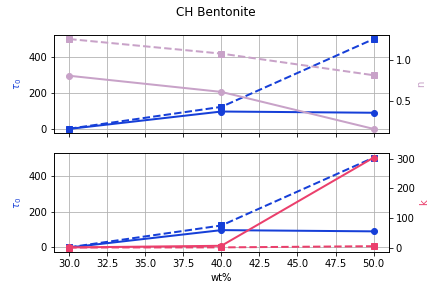

In [43]:
dfs_CH = [CH_NOPS_30, CH_NOPS_40, CH_NOPS_50_2]
wts = [30, 40, 50]
taus = []
ks = []
ns = []
for df in dfs_CH:
    result = hs_mod.fit(df['ss'][-27:], sr=df['sr'][-27:], tau_0=1, k=1, n=1)
    tau_0, k, n = result.params.valuesdict().values()
    taus.append(tau_0)
    ks.append(k)
    ns.append(n)

f, axs = plt.subplots(2,1, sharex=True)
ax1, ax3 = axs
ax2 = ax1.twinx()
ax4 = ax3.twinx()

ax1.plot(wts, taus, c=c1, marker='o')
ax2.plot(wts, ns, c=c2, marker='o')
ax3.plot(wts, taus, c=c1, marker='o')
ax4.plot(wts, ks, c=c3, marker='o')

ax1.plot(wts, taus_manual, c=c1, marker='s', ls='--')
ax2.plot(wts, ns_manual, c=c2, marker='s', ls='--')
ax3.plot(wts, taus_manual, c=c1, marker='s', ls='--')
ax4.plot(wts, ks_manual, c=c3, marker='s', ls='--')

ax1.set_ylabel(r'$\tau_0$', color=c1)
ax2.set_ylabel('n', color=c2)
ax3.set_ylabel(r'$\tau_0$', color=c1)
ax4.set_ylabel('k', color=c3)

ax3.set_xlabel('wt%')

#ax1.set_ylim(0,100)
#ax3.set_ylim(0,100)


ax1.grid()
ax3.grid()
plt.suptitle('CH Bentonite')

plt.show()

[[Model]]
    Model(hs_model)
[[Fit Statistics]]
    # function evals   = 162
    # data points      = 17
    # variables        = 3
    chi-square         = 1389.345
    reduced chi-square = 99.239
    Akaike info crit   = 80.857
    Bayesian info crit = 83.357
[[Variables]]
    tau_0:   246.493620 +/- 99.48777 (40.36%) (init= 500)
    k:       179.610235 +/- 78.09138 (43.48%) (init= 1)
    n:       0.20886923 +/- 0.047373 (22.68%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(k, n)                      = -0.999 
    C(tau_0, k)                  = -0.998 
    C(tau_0, n)                  =  0.994 



<IPython.core.display.Javascript object>


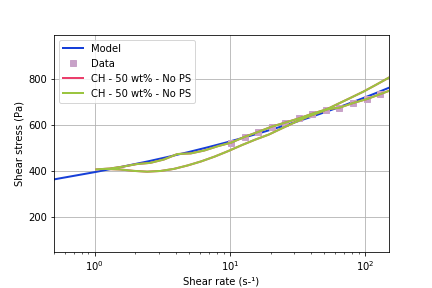

In [51]:
%matplotlib notebook
i=2
t = taus[i]
n = ns[i]
k = ks[i]
xs = np.linspace(0,500,1000)

result = hs_mod.fit(CH_NOPS_50_2['ss'][-27:], sr=CH_NOPS_50_2['sr'][-27:], tau_0=500, k=1, n=1)
print(result.fit_report())

plt.plot(xs, t+k*xs**n, label='Model')
plt.plot(dfs_CH[i]['sr'][-27:], dfs_CH[i]['ss'][-27:], 's', label='Data')

plt.xlabel('Shear rate (s-¹)')
plt.ylabel('Shear stress (Pa)')

plt.legend()

plt.grid()
plt.show()

# CH vs L3 - t1

In [5]:
CH_NOPS_30_t1_1 = pd.read_csv(r'./kinexus/CH HB - NoPS - 30% - t1 - 1.csv', header=0, delimiter=',')
CH_NOPS_30_t1_2 = pd.read_csv(r'./kinexus/CH HB - NoPS - 30% - t1 - 2.csv', header=0, delimiter=',')
CH_NOPS_30_t1_3 = pd.read_csv(r'./kinexus/CH HB - NoPS - 30% - t1 - 3.csv', header=0, delimiter=',')
CH_NOPS_40_t1_1 = pd.read_csv(r'./kinexus/CH HB - NoPS - 40% - t1 - 2.csv', header=0, delimiter=',')
CH_NOPS_40_t1_2 = pd.read_csv(r'./kinexus/CH HB - NoPS - 40% - t1 - 1.csv', header=0, delimiter=',')

L3_NOPS_30_t1 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 30% - t1.csv', header=0, delimiter=',')
L3_NOPS_40_t1 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 40% - t1.csv', header=0, delimiter=',')
L3_NOPS_50_t1 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 50% - t1.csv', header=0, delimiter=',')
L3_NOPS_60_t1_1 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 60% - t1 - 1.csv', header=0, delimiter=',')
L3_NOPS_60_t1_2 = pd.read_csv(r'./kinexus/L3 HB - NoPS - 60% - t1 - 2.csv', header=0, delimiter=',')

dfs_t1 = [CH_NOPS_30_t1_1,
CH_NOPS_30_t1_2,
CH_NOPS_30_t1_3,
CH_NOPS_40_t1_1,
CH_NOPS_40_t1_2,
L3_NOPS_30_t1,
L3_NOPS_40_t1,
L3_NOPS_50_t1,
L3_NOPS_60_t1_1,
L3_NOPS_60_t1_2]


for df in dfs_t1:
    df.columns = ['ss', 'sr', 'eta', 'omega', 'Steady state']

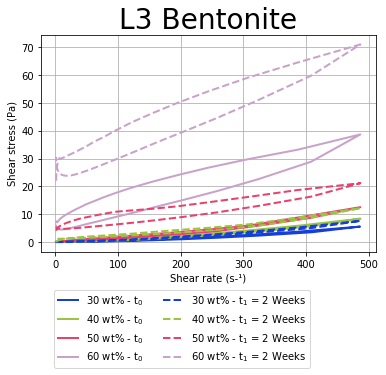

In [6]:
f, ax = plt.subplots(1)

ax.plot(L3_NOPS_30['sr'], L3_NOPS_30['ss'], label='30 wt% - t$_0$', c=c1)
ax.plot(L3_NOPS_40['sr'], L3_NOPS_40['ss'], label='40 wt% - t$_0$', c=c2)
ax.plot(L3_NOPS_50_2['sr'], L3_NOPS_50_2['ss'], label='50 wt% - t$_0$', c=c3)
ax.plot(L3_NOPS_60_2['sr'], L3_NOPS_60_2['ss'], label='60 wt% - t$_0$', c=c4)

ax.plot(L3_NOPS_30_t1['sr'], L3_NOPS_30_t1['ss'], label='30 wt% - t$_1$ = 2 Weeks', ls='--', c=c1)
ax.plot(L3_NOPS_40_t1['sr'], L3_NOPS_40_t1['ss'], label='40 wt% - t$_1$ = 2 Weeks', ls='--', c=c2)
ax.plot(L3_NOPS_50_t1['sr'], L3_NOPS_50_t1['ss'], label='50 wt% - t$_1$ = 2 Weeks', ls='--', c=c3)
ax.plot(L3_NOPS_60_t1_2['sr'], L3_NOPS_60_t1_2['ss'], label='60 wt% - t$_1$ = 2 Weeks', ls='--', c=c4)



ax.set_xlabel('Shear rate (s-¹)')
ax.set_ylabel('Shear stress (Pa)')

ax.legend(ncol=2, bbox_to_anchor=(0.82, -0.15))
ax.grid()
plt.title('L3 Bentonite', fontsize=28)  
plt.savefig('./Rheology/Results/L3-Aging.png', dpi=600, bbox_inches='tight')
plt.show()

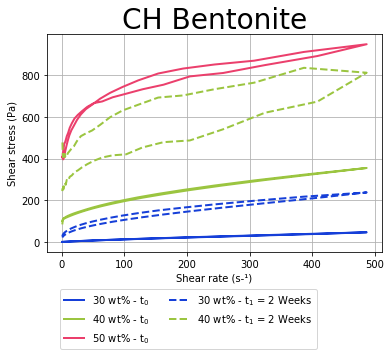

In [131]:
f, ax = plt.subplots(1)

ax.plot(CH_NOPS_30['sr'], CH_NOPS_30['ss'], label='30 wt% - t$_0$', c=c1)
ax.plot(CH_NOPS_40['sr'], CH_NOPS_40['ss'], label='40 wt% - t$_0$', c=c2)
ax.plot(CH_NOPS_50_2['sr'], CH_NOPS_50_2['ss'], label='50 wt% - t$_0$', c=c3)

ax.plot(CH_NOPS_30_t1_2['sr'], CH_NOPS_30_t1_2['ss'], label='30 wt% - t$_1$ = 2 Weeks', ls='--', c=c1)
ax.plot(CH_NOPS_40_t1_2['sr'], CH_NOPS_40_t1_2['ss'], label='40 wt% - t$_1$ = 2 Weeks', ls='--', c=c2)


ax.set_xlabel('Shear rate (s-¹)')
ax.set_ylabel('Shear stress (Pa)')

ax.legend(ncol=2, bbox_to_anchor=(0.82, -0.15))

ax.grid()
plt.title('CH Bentonite', fontsize=28)  
plt.savefig('./Rheology/Results/CH-Aging.png', dpi=600, bbox_inches='tight')
plt.show()

In [104]:
chs = [CH_NOPS_30, CH_NOPS_40, CH_NOPS_50_2, CH_NOPS_30_t1_2, CH_NOPS_40_t1_2]
l3s = [L3_NOPS_30, L3_NOPS_40, L3_NOPS_50_2, L3_NOPS_60_2, L3_NOPS_30_t1, L3_NOPS_40_t1, L3_NOPS_50_t1, L3_NOPS_60_t1_2]

chs_taus = []
chs_ks = []
chs_ns = []

l3s_taus = []
l3s_ks = []
l3s_ns = []

for df in chs:
    result = hs_mod.fit(df['ss'][-27:], sr=df['sr'][-27:], tau_0=1, k=1, n=1)
    tau_0, k, n = result.params.valuesdict().values()
    chs_taus.append(tau_0)
    chs_ks.append(k)
    chs_ns.append(n)
    
for df in l3s:
    result = hs_mod.fit(df['ss'][-27:], sr=df['sr'][-27:], tau_0=1, k=1, n=1)
    tau_0, k, n = result.params.valuesdict().values()
    l3s_taus.append(tau_0)
    l3s_ks.append(k)
    l3s_ns.append(n)

chs_taus[0] = -chs_taus[0]
chs_taus[2] = 362

In [98]:
chs_lval_tau = []
l3s_lval_tau = []
for df in chs:
    chs_lval_tau.append(df['ss'][53])
for df in l3s:
    l3s_lval_tau.append(df['ss'][53])

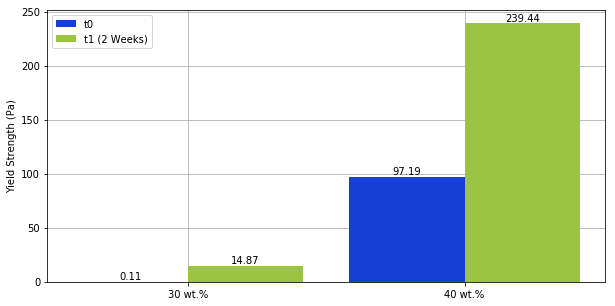

In [165]:
xs_labels = ['t0', 't1']
width = 0.25
pos = [i*len(xs_labels)*width*1.2 for i in range(len(chs_taus[:2]))]
fig, ax = plt.subplots(figsize=(10,5))

rects1 = plt.bar(pos[:2], chs_taus[:2], width, zorder=3, label='t0')
rects2 = plt.bar(np.array(pos[:2]) + width, chs_taus[3:], width, zorder=3, label='t1 (2 Weeks)')

ax.set_xticks([p + width/2 for p in pos])
ax.set_xticklabels(['30 wt.%', '40 wt.%'])
#plt.xlim(-0.25,1.75)

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%0.2f' % height, ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%0.2f' % height, ha='center', va='bottom')
plt.ylabel('Yield Strength (Pa)')
plt.legend()
plt.grid()
plt.savefig('./Rheology/Results/CH-YS-Aging.png', dpi=600)
plt.show()

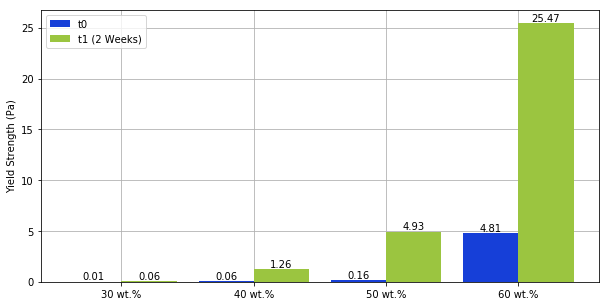

In [166]:
xs_labels = ['t0', 't1']
width = 0.25
pos = [i*len(xs_labels)*width*1.2 for i in range(len(l3s_taus[:4]))]
fig, ax = plt.subplots(figsize=(10,5))

rects1 = plt.bar(pos[:4], l3s_taus[:4], width, zorder=3, label='t0')
rects2 = plt.bar(np.array(pos[:4]) + width, l3s_taus[4:], width, zorder=3, label='t1 (2 Weeks)')

ax.set_xticks([p + width/2 for p in pos])
ax.set_xticklabels(['30 wt.%', '40 wt.%', '50 wt.%', '60 wt.%'])
#plt.xlim(0,1.6)

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%0.2f' % height, ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%0.2f' % height, ha='center', va='bottom')

    
    
plt.ylabel('Yield Strength (Pa)')
plt.legend()
plt.grid()
plt.savefig('./Rheology/Results/L3-YS-Aging.png', dpi=600)
plt.show()

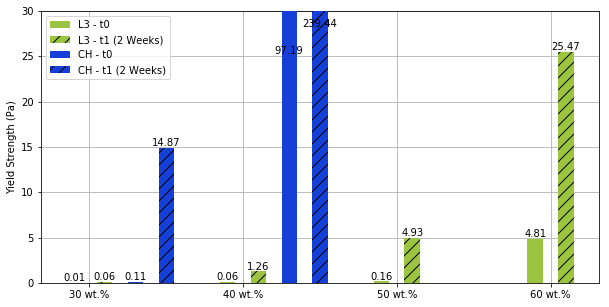

In [164]:
xs_labels = ['t0', 't1']
width = 0.25
pos = [i*len(xs_labels)*width*5 for i in range(4)]
fig, ax = plt.subplots(figsize=(10,5))

rects1 = plt.bar(pos[:4], l3s_taus[:4], width, zorder=3, label='L3 - t0', color=c2)
rects2 = plt.bar(np.array(pos[:4]) + 2* width, l3s_taus[4:], width, zorder=3, label='L3 - t1 (2 Weeks)', color=c2, hatch='//')
rects3 = plt.bar(np.array(pos[:2]) + 4 * width, chs_taus[:2], width, zorder=3, label='CH - t0', color=c1)
rects4 = plt.bar(np.array(pos[:2]) + 6 * width, chs_taus[3:], width, zorder=3, label='CH - t1 (2 Weeks)', color=c1, hatch='//')

ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(['30 wt.%', '40 wt.%', '50 wt.%', '60 wt.%'])

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%0.2f' % height, ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%0.2f' % height, ha='center', va='bottom')
for rect in rects3:
    height = rect.get_height()
    y = height
    if height>25:
        y = 25
    ax.text(rect.get_x() + rect.get_width()/2., y,
            '%0.2f' % height, ha='center', va='bottom')
for rect in rects4:
    height = rect.get_height()
    y = height
    if height>25:
        y = 28
    ax.text(rect.get_x() + rect.get_width()/2., y,
            '%0.2f' % height, ha='center', va='bottom')
    
    
plt.ylabel('Yield Strength (Pa)')
plt.legend()
plt.grid()
plt.ylim(0,30)
plt.savefig('./Rheology/Results/L3vsCH-YS-Aging.png', dpi=600)
plt.show()

# Acidic

In [7]:
CH_MAP_NOPS_30_t0_1 = pd.read_csv(r'./kinexus/CH HB - MAP - NoPS - 30% - t0 - 1.csv', header=0, delimiter=',')
CH_MAP_NOPS_30_t0_2 = pd.read_csv(r'./kinexus/CH HB - MAP - NoPS - 30% - t0 - 2.csv', header=0, delimiter=',')
L3_MAP_NOPS_30_t0_1 = pd.read_csv(r'./kinexus/L3 HB - MAP - NoPS - 30% - t0 - 1.csv', header=0, delimiter=',')
L3_MAP_NOPS_30_t0_2 = pd.read_csv(r'./kinexus/L3 HB - MAP - NoPS - 30% - t0 - 2.csv', header=0, delimiter=',')
USA_MAP_NOPS_30_t0_1 = pd.read_csv(r'./kinexus/USA HB - MAP - NoPS - 30% - t0 - 1.csv', header=0, delimiter=',')
USA_MAP_NOPS_30_t0_2 = pd.read_csv(r'./kinexus/USA HB - MAP - NoPS - 30% - t0 - 2.csv', header=0, delimiter=',')

CH_MAP_NOPS_30_t1_1 = pd.read_csv(r'./kinexus/CH HB - MAP - NoPS - 30% - t1 - 1.csv', header=0, delimiter=',')
CH_MAP_NOPS_30_t1_2 = pd.read_csv(r'./kinexus/CH HB - MAP - NoPS - 30% - t1 - 2.csv', header=0, delimiter=',')
L3_MAP_NOPS_30_t1_1 = pd.read_csv(r'./kinexus/L3 HB - MAP - NoPS - 30% - t1 - 1.csv', header=0, delimiter=',')
L3_MAP_NOPS_30_t1_2 = pd.read_csv(r'./kinexus/L3 HB - MAP - NoPS - 30% - t1 - 2.csv', header=0, delimiter=',')

dfs_MAP = [CH_MAP_NOPS_30_t0_1, CH_MAP_NOPS_30_t0_2, L3_MAP_NOPS_30_t0_1, L3_MAP_NOPS_30_t0_2, USA_MAP_NOPS_30_t0_1, 
       USA_MAP_NOPS_30_t0_2, CH_MAP_NOPS_30_t1_1, CH_MAP_NOPS_30_t1_2, L3_MAP_NOPS_30_t1_1, L3_MAP_NOPS_30_t1_2]
for df in dfs_MAP:
    df.columns = ['ss', 'sr', 'eta', 'omega', 'Steady state']

In [8]:
USA_NOPS_30_t0_1 = pd.read_csv(r'./kinexus/USA HB - NoPS 30% - t0 - 1.csv', header=0, delimiter=',')
#USA_NOPS_30_t0_2 = pd.read_csv(r'./kinexus/USA_NOPS_30_t0_2', header=0, delimiter=',')

dfs_t0_usa = [USA_NOPS_30_t0_1]
for df in dfs_t0_usa:
    df.columns = ['ss', 'sr', 'eta', 'omega', 'Steady state']

In [9]:
USA_NOPS_30_t1_1 = pd.read_csv(r'./kinexus/USA HB - NoPS - 30% - t1 - 1.csv', header=0, delimiter=',')
USA_NOPS_30_t1_2 = pd.read_csv(r'./kinexus/USA HB - NoPS - 30% - t1 - 2.csv', header=0, delimiter=',')

USA_MAP_NOPS_30_t1_1 = pd.read_csv(r'./kinexus/USA HB - MAP - NoPS - 30% - t1 - 1.csv', header=0, delimiter=',')
USA_MAP_NOPS_30_t1_2 = pd.read_csv(r'./kinexus/USA HB - MAP - NoPS - 30% - t1 - 2.csv', header=0, delimiter=',')
USA_MAP_NOPS_30_t1_3 = pd.read_csv(r'./kinexus/USA HB - MAP - NoPS - 30% - t1 - 3.csv', header=0, delimiter=',')
dfs_t1_usa = [USA_NOPS_30_t1_1, USA_NOPS_30_t1_2, USA_MAP_NOPS_30_t1_1, USA_MAP_NOPS_30_t1_2, USA_MAP_NOPS_30_t1_3]
for df in dfs_t1_usa:
    df.columns = ['ss', 'sr', 'eta', 'omega', 'Steady state']

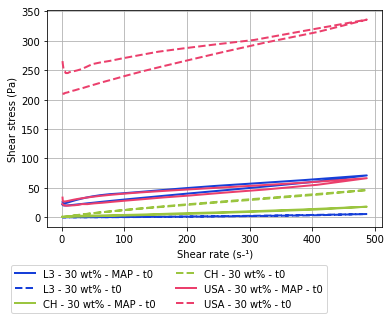

In [10]:
f, ax = plt.subplots(1)

ax.plot(L3_MAP_NOPS_30_t0_2['sr'], L3_MAP_NOPS_30_t0_2['ss'], label='L3 - 30 wt% - MAP - t0', c=c1)
ax.plot(L3_NOPS_30['sr'], L3_NOPS_30['ss'], label='L3 - 30 wt% - t0', c=c1, ls='--')


ax.plot(CH_MAP_NOPS_30_t0_2['sr'], CH_MAP_NOPS_30_t0_2['ss'], label='CH - 30 wt% - MAP - t0', c=c2)
ax.plot(CH_NOPS_30['sr'], CH_NOPS_30['ss'], label='CH - 30 wt% - t0', c=c2, ls='--')

ax.plot(USA_MAP_NOPS_30_t0_1['sr'], USA_MAP_NOPS_30_t0_1['ss'], label='USA - 30 wt% - MAP - t0', c=c3)
ax.plot(USA_NOPS_30_t0_1['sr'], USA_NOPS_30_t0_1['ss'], label='USA - 30 wt% - t0', c=c3, ls='--')

#ax.plot(L3_NOPS_30_t1['sr'], L3_NOPS_30_t1['ss'], label='L3 - 30 wt% - t1', ls='--', c=c1)
#ax.plot(L3_NOPS_40_t1['sr'], L3_NOPS_40_t1['ss'], label='L3 - 40 wt% - t1', ls='--', c=c2)
#ax.plot(L3_NOPS_50_t1['sr'], L3_NOPS_50_t1['ss'], label='L3 - 50 wt% - t1', ls='--', c=c3)
#ax.plot(L3_NOPS_60_t1_2['sr'], L3_NOPS_60_t1_2['ss'], label='L3 - 60 wt% - t1', ls='--', c=c4)



ax.set_xlabel('Shear rate (s-¹)')
ax.set_ylabel('Shear stress (Pa)')

ax.legend(ncol=2, bbox_to_anchor=(0.85, -0.15))
ax.grid()
    
#plt.savefig('./Rheology/Results/L3-Aging.png', dpi=600, bbox_inches='tight')
plt.show()

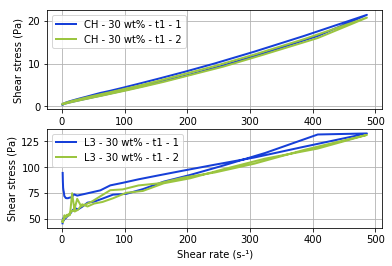

In [14]:
f, ax = plt.subplots(2,1)

ax[0].plot(CH_MAP_NOPS_30_t1_1['sr'], CH_MAP_NOPS_30_t1_1['ss'], label='CH - 30 wt% - t1 - 1', c=c1)
ax[0].plot(CH_MAP_NOPS_30_t1_2['sr'], CH_MAP_NOPS_30_t1_2['ss'], label='CH - 30 wt% - t1 - 2', c=c2)

ax[1].plot(L3_MAP_NOPS_30_t1_1['sr'], L3_MAP_NOPS_30_t1_1['ss'], label='L3 - 30 wt% - t1 - 1', c=c1)
ax[1].plot(L3_MAP_NOPS_30_t1_2['sr'], L3_MAP_NOPS_30_t1_2['ss'], label='L3 - 30 wt% - t1 - 2', c=c2)

#ax.plot(L3_NOPS_30_t1['sr'], L3_NOPS_30_t1['ss'], label='L3 - 30 wt% - t1', ls='--', c=c1)
#ax.plot(L3_NOPS_40_t1['sr'], L3_NOPS_40_t1['ss'], label='L3 - 40 wt% - t1', ls='--', c=c2)
#ax.plot(L3_NOPS_50_t1['sr'], L3_NOPS_50_t1['ss'], label='L3 - 50 wt% - t1', ls='--', c=c3)
#ax.plot(L3_NOPS_60_t1_2['sr'], L3_NOPS_60_t1_2['ss'], label='L3 - 60 wt% - t1', ls='--', c=c4)



ax[0].set_ylabel('Shear stress (Pa)')

ax[1].set_xlabel('Shear rate (s-¹)')
ax[1].set_ylabel('Shear stress (Pa)')

ax[0].legend(ncol=1)
ax[0].grid()
ax[1].legend(ncol=1)
ax[1].grid()
                 
#plt.savefig('./Rheology/Results/L3-Aging.png', dpi=600, bbox_inches='tight')
plt.show()

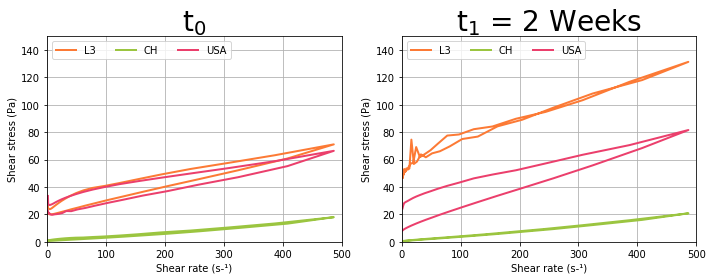

In [12]:
f, axs = plt.subplots(1,2, figsize=(10, 4))

axs[0].plot(L3_MAP_NOPS_30_t0_2['sr'], L3_MAP_NOPS_30_t0_2['ss'], label='L3', c=c5)
#axs[0].plot(L3_NOPS_30['sr'], L3_NOPS_30['ss'], label='L3 - H$_2$O', c=c1, ls=':')
axs[0].plot(CH_MAP_NOPS_30_t0_2['sr'], CH_MAP_NOPS_30_t0_2['ss'], label='CH', c=c2)
#axs[0].plot(CH_NOPS_30['sr'], CH_NOPS_30['ss'], label='CH - H$_2$O', c=c2, ls=':')
axs[0].plot(USA_MAP_NOPS_30_t0_1['sr'], USA_MAP_NOPS_30_t0_1['ss'], label='USA', c=c3)
#axs[0].plot(USA_NOPS_30_t0_1['sr'], USA_NOPS_30_t0_1['ss'], label='USA - H$_2$O%', c=c3, ls=':')


axs[1].plot(L3_MAP_NOPS_30_t1_2['sr'], L3_MAP_NOPS_30_t1_2['ss'], label='L3', c=c5)
#axs[1].plot(L3_NOPS_30_t1['sr'], L3_NOPS_30_t1['ss'], label='L3 - H$_2$O', c=c1, ls=':')
axs[1].plot(CH_MAP_NOPS_30_t1_2['sr'], CH_MAP_NOPS_30_t1_2['ss'], label='CH', c=c2)
#axs[1].plot(CH_NOPS_30_t1_3['sr'], CH_NOPS_30_t1_3['ss'], label='CH - H$_2$O', c=c2, ls=':')
axs[1].plot(USA_MAP_NOPS_30_t1_1['sr'], USA_MAP_NOPS_30_t1_1['ss'], label='USA', c=c3)
#axs[1].plot(USA_NOPS_30_t1_2['sr'], USA_NOPS_30_t1_2['ss'], label='USA - H$_2$O%', c=c3, ls=':')

#ax.plot(L3_NOPS_30_t1['sr'], L3_NOPS_30_t1['ss'], label='L3 - t1', ls=':', c=c1)
#ax.plot(L3_NOPS_40_t1['sr'], L3_NOPS_40_t1['ss'], label='L3 - 40 wt% - t1', ls=':', c=c2)
#ax.plot(L3_NOPS_50_t1['sr'], L3_NOPS_50_t1['ss'], label='L3 - 50 wt% - t1', ls=':', c=c3)
#ax.plot(L3_NOPS_60_t1_2['sr'], L3_NOPS_60_t1_2['ss'], label='L3 - 60 wt% - t1', ls=':', c=c4)


for ax in axs:
    ax.set_xlabel('Shear rate (s-¹)')
    ax.set_ylabel('Shear stress (Pa)')
    ax.set_ylim(0, 150)
    ax.set_xlim(0, 500)
    ax.grid()

axs[0].legend(ncol=3, loc='upper left')
axs[0].set_title('t$_0$', fontsize=28)
axs[1].legend(ncol=3, loc='upper left')
axs[1].set_title('t$_1$ = 2 Weeks', fontsize=28)

plt.tight_layout()
plt.savefig('./Rheology/Results/Acidic.png', dpi=600, bbox_inches='tight')
plt.show()

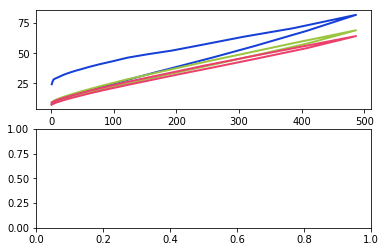

In [14]:
f, ax = plt.subplots(2,1)

ax[0].plot(USA_MAP_NOPS_30_t1_1['sr'], USA_MAP_NOPS_30_t1_1['ss'], label='USA - 30 wt% - t1 - 1', c=c1)
ax[0].plot(USA_MAP_NOPS_30_t1_2['sr'], USA_MAP_NOPS_30_t1_2['ss'], label='USA - 30 wt% - t1 - 2', c=c2)
ax[0].plot(USA_MAP_NOPS_30_t1_3['sr'], USA_MAP_NOPS_30_t1_3['ss'], label='USA - 30 wt% - t1 - 3', c=c3)

# Data Mining

In [11]:
def test(data):
    name =[x for x in globals() if globals()[x] is data][0]
    return name


In [12]:
df_total = dfs_t0 + dfs_t0_usa + dfs_t1 + dfs_t1_usa + dfs_MAP
df = 0
labels = []
[labels.append(test(i)) for i in df_total];
#total = dict( (name,eval(name)) for name in ['some','list','of','vars'] )

In [13]:
dict_summary = dict(zip(labels, df_total))

In [17]:
taus = []
ks = []
ns = []
rs = []
for df in df_total:
    result = hs_mod.fit(df['ss'][-27:], sr=df['sr'][-27:], tau_0=1, k=1, n=1)
    tau_0, k, n = result.params.valuesdict().values()
    taus.append(tau_0)
    ks.append(k)
    ns.append(n)
    rs.append(1 - result.residual.var() / np.var(df['ss'][-27:]*100))    

df_summary = pd.DataFrame(list(zip(labels, taus, ks, ns, rs)), columns=['Sample', r'$\tau_0$', 'k', 'n', 'r²'])

In [ ]:
hs_mod.fit(df_total[0]['ss'][-27:], sr=df_total[0]['sr'][-27:], tau_0=1, k=1, n=1)

In [19]:
df_summary = df_summary.sort_values(by=['Sample']).reset_index(drop=1)

In [20]:
df_summary

,Sample,$\tau_0$,k,n,r²
0,CH_MAP_NOPS_30_t0_1,0.714021,0.007955,1.225364,1.000000
1,CH_MAP_NOPS_30_t0_2,0.653981,0.008491,1.213010,1.000000
2,CH_MAP_NOPS_30_t1_1,0.553568,0.015557,1.150633,1.000000
3,CH_MAP_NOPS_30_t1_2,0.530862,0.015422,1.147352,1.000000
4,CH_NOPS_30,-0.112072,0.295027,0.808897,1.000000
5,CH_NOPS_30_t1_1,22.752055,6.579256,0.570911,1.000000
6,CH_NOPS_30_t1_2,14.874760,8.030465,0.529050,1.000000
7,CH_NOPS_30_t1_3,10.703373,8.470732,0.510927,1.000000
8,CH_NOPS_40,97.185906,5.850644,0.611019,1.000000
9,CH_NOPS_40_t1_1,176.758104,2.881747,0.791716,0.999993


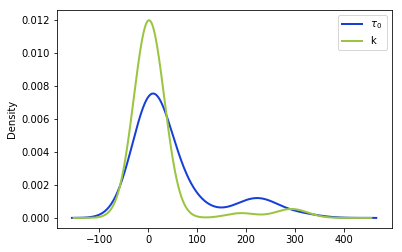

In [102]:
df_summary.plot('n', kind='kde')

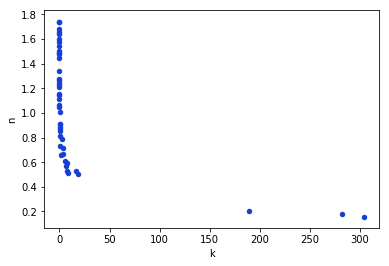

In [95]:
df_summary.plot(x = 'k', y='n', kind='scatter')

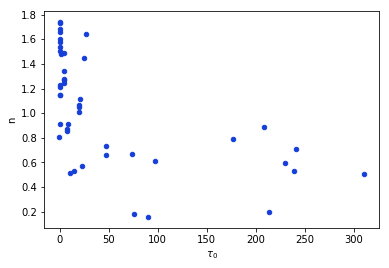

In [96]:
df_summary.plot(x = r'$\tau_0$', y='n', kind='scatter')

In [127]:
intervals = [5, 10, 20, 40]
ls = [1, 4, 10, 20]
for l in ls:
    for i in intervals:
        xs = np.linspace(-l, l, i)
        f = xs
        g = xs**2 - 0.5
        print(' Interval: %d' %l, '\n', 'Mesh : %d' %i, '\n', f@g)

 Interval: 1 
 Mesh : 5 
 0.0
 Interval: 1 
 Mesh : 10 
 -3.33066907388e-16
 Interval: 1 
 Mesh : 20 
 -5.55111512313e-16
 Interval: 1 
 Mesh : 40 
 -6.66133814775e-16
 Interval: 4 
 Mesh : 5 
 0.0
 Interval: 4 
 Mesh : 10 
 -3.01980662698e-14
 Interval: 4 
 Mesh : 20 
 -7.1054273576e-14
 Interval: 4 
 Mesh : 40 
 -8.52651282912e-14
 Interval: 10 
 Mesh : 5 
 0.0
 Interval: 10 
 Mesh : 10 
 3.97903932026e-13
 Interval: 10 
 Mesh : 20 
 -6.8212102633e-13
 Interval: 10 
 Mesh : 40 
 -3.18323145621e-12
 Interval: 20 
 Mesh : 5 
 0.0
 Interval: 20 
 Mesh : 10 
 3.41060513165e-12
 Interval: 20 
 Mesh : 20 
 -5.45696821064e-12
 Interval: 20 
 Mesh : 40 
 -2.91038304567e-11
